# Introduction
This colab worksheet provides a starting point for the computer vision assignment. 

# Data Loading

In [ ]:
# Download the data stored in a zipped numpy array from one of these two locations
# The uncommented one is likely to be faster. If you're running all your experiments
# on a machine at home rather than using colab, then make sure you save it 
# rather than repeatedly downloading it.

#!wget "http://users.sussex.ac.uk/~is321/training_images.npz" -O training_images.npz
!wget "https://sussex.box.com/shared/static/jqrklxpl2c5hnrkpa2m7f9da2o3np8g9.npz" -O training_images.npz

# The test images (without points)
#!wget "http://users.sussex.ac.uk/~is321/test_images.npz" -O test_images.npz
!wget "https://sussex.box.com/shared/static/xxlgvjpa86s6xgjzy5im06saoj57s7gt.npz" -O test_images.npz

# The example images are here
#!wget "http://users.sussex.ac.uk/~is321/examples.npz" -O examples.npz
!wget "https://sussex.box.com/shared/static/kbodelmaqw5dd59i5x2kis55lor7ydhf.npz" -O examples.npz



--2022-05-12 00:34:24--  https://sussex.box.com/shared/static/jqrklxpl2c5hnrkpa2m7f9da2o3np8g9.npz
Resolving sussex.box.com (sussex.box.com)... 107.152.29.197
Connecting to sussex.box.com (sussex.box.com)|107.152.29.197|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /public/static/jqrklxpl2c5hnrkpa2m7f9da2o3np8g9.npz [following]
--2022-05-12 00:34:24--  https://sussex.box.com/public/static/jqrklxpl2c5hnrkpa2m7f9da2o3np8g9.npz
Reusing existing connection to sussex.box.com:443.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://sussex.app.box.com/public/static/jqrklxpl2c5hnrkpa2m7f9da2o3np8g9.npz [following]
--2022-05-12 00:34:24--  https://sussex.app.box.com/public/static/jqrklxpl2c5hnrkpa2m7f9da2o3np8g9.npz
Resolving sussex.app.box.com (sussex.app.box.com)... 107.152.29.201
Connecting to sussex.app.box.com (sussex.app.box.com)|107.152.29.201|:443... connected.
HTTP request sent, awaiting response... 302 Found
Loca

# Check the data downloaded correctly
If any of these assertions fail, redownload the data

In [ ]:
def confirm_checksum(filename, true_checksum):
  import subprocess
  checksum = subprocess.check_output(['shasum',filename]).decode('utf-8')
  assert checksum.split(' ')[0] == true_checksum, 'Checksum does not match for ' + filename + ' redownload the data.'

confirm_checksum('training_images.npz', 'f313a54fc57a1235e6307d176fc5fc83fd7ec530')
confirm_checksum('test_images.npz', '4b9efd8eb3b87c07d9c5400ef2494d476bc318a3')
confirm_checksum('examples.npz', 'bf51ebbf42f17e3cbe06bb299746565c53d16c40')

# Load the data

In [ ]:
import numpy as np


# Load the data using np.load
data = np.load('training_images.npz', allow_pickle=True)

# Extract the images
images = data['images']
# and the data points
pts = data['points']

print(images.shape, pts.shape)

test_data = np.load('test_images.npz', allow_pickle=True)
test_images = test_data['images']
print(test_images.shape)

example_data = np.load('examples.npz', allow_pickle=True)
example_images= example_data['images']
print(example_images.shape)

(2811, 244, 244, 3) (2811, 42, 2)
(554, 244, 244, 3)
(6, 244, 244, 3)


**https://www.youtube.com/watch?v=vC3bTziLRTA**

# Data Visualisation
Here's an example of how to display the images and their points

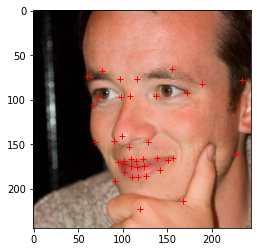

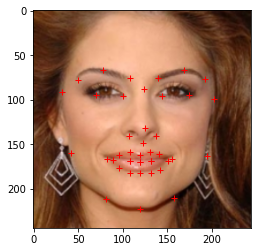

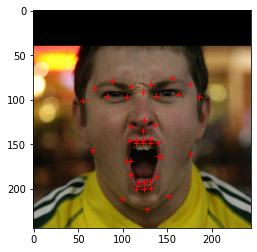

In [ ]:

def visualise_pts(img, pts):
  import matplotlib.pyplot as plt
  plt.imshow(img)
  plt.plot(pts[:, 0], pts[:, 1], '+r')
  plt.show()

for i in range(3):
  idx = np.random.randint(0, images.shape[0])
  visualise_pts(images[idx], pts[idx, ...])

In [ ]:
#blurring first 50 images and add them to the training set
#augumentation
import matplotlib.pyplot as plt
import cv2
#blur_image = cv2.medianBlur(images[0],9)
x=np.zeros((50,244, 244, 3))
p= np.zeros((50,42,2))
for i in range(50):
  x[i] = cv2.medianBlur(images[i],7)
  x[i]=x[i]/255
  p[i] = pts[i]
a=np.append(x,images,axis=0)
b=np.append(p,pts,axis=0)

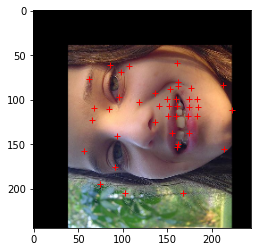

In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
for i in range(3):
  img = cv2.rotate(images[i],rotateCode=2)
  x = np.rot90(pts[i])

y = np.reshape(x,(42,2))
for i in range(3):
  k=np.concatenate((pts[i,...], y))

plt.imshow(img)
plt.plot(x[0,:], x[1,:], '+r')
plt.show()

BUILD, TRAIN AND SAVE THE CONVOLUTIONAL MODE

In [ ]:
import cv2
# Helper functions #
import matplotlib.pyplot as plt
# Convert images to greyscale

def convert_to_grey(images):
  grey_images= []
  for image in images: 
    new_img= cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    grey_images.append(new_img)
  
  return np.array(grey_images)

# Function to visualise points on an image

def visualise_pts(img, pts):
  plt.imshow(img)
  plt.plot(pts[:, 0], pts[:, 1], '+r')
  plt.show()

In [ ]:
#changing the color channel of first 5 images and adding them to the training set
#augumentation
c=np.zeros((5,244, 244, 3))
d= np.zeros((5,42,2))
for i in range(5):
  c[i,:,:]=np.clip(images[i,:,:]+10, 0, 200)
  c[i]=c[i]/255
  d[i] = pts[i]

final_images=np.append(c*255,a,axis=0)
final_points=np.append(d,b,axis=0)
print(final_images.shape)
print(final_points.shape)

(2866, 244, 244, 3)
(2866, 42, 2)


In [ ]:
# Select first 700 images and corresponding keypoints
X_train = final_images[:700, :]
y_train = final_points[:700, :]

# Select 300 images and corresponding keypoints after the 2000 mark
X_val = final_images[2000:2300, :]
y_val= final_points[2000:2300, :]

# Divide the image data to put it in the right range and convert to floating point numbers

X_train = X_train.astype("float32") / 255
X_val = X_val.astype("float32") / 255
X_test= test_images.astype("float32") / 255
example_images= example_images.astype("float32") / 255

# Convert the labels to floating point

y_train = y_train.astype("float32") 
y_val = y_val.astype("float32") 

# Reshape keypoints array into single dimension
print(y_train.shape)
y_train= y_train.reshape(-1, 42*2)
y_val= y_val.reshape(-1, 42*2)
print(y_train.shape)
print(y_val.shape)

(700, 42, 2)
(700, 84)
(300, 84)




**MODEL**

In [ ]:
######   BUILD, TRAIN AND SAVE THE CONVOLUTIONAL MODEL    ########


from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, GlobalAveragePooling2D, Activation
from keras.layers import Flatten, Dense
from keras.layers import LayerNormalization
from keras import optimizers
from keras.callbacks import ModelCheckpoint, History
# from keras.optimizers import Adam


# Main model
def the_model():
    model = Sequential()
    
    model.add(Conv2D(16, (3,3), padding='same', activation='relu', input_shape= (244,244,3))) # Input shape: (x=244, y=244, colourChanell=3)
    model.add(MaxPooling2D(pool_size=2))
    
    model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    
    model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    
    model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    
    model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    
    # Convert all values to 1D array
    model.add(Flatten())
    
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.2))

    model.add(Dense(84))
    
    return model
model = the_model()
hist = History()

checkpointer = ModelCheckpoint(filepath='checkpoint1.hdf5', 
                               verbose=1, save_best_only=True)

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 244, 244, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 122, 122, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [ ]:
history=model.fit(X_train, y_train, epochs= 60, batch_size= 64, validation_data=(X_val, y_val))

Epoch 1/60
11/11 [==============================] - 58s 5s/step - loss: 11545.7568 - accuracy: 0.0043 - val_loss: 3069.9548 - val_accuracy: 0.0267
Epoch 2/60
11/11 [==============================] - 54s 5s/step - loss: 2914.1782 - accuracy: 0.3214 - val_loss: 801.3707 - val_accuracy: 0.7867
Epoch 3/60
11/11 [==============================] - 53s 5s/step - loss: 1347.0920 - accuracy: 0.4071 - val_loss: 480.8414 - val_accuracy: 0.0133
Epoch 4/60
11/11 [==============================] - 53s 5s/step - loss: 817.0972 - accuracy: 0.1657 - val_loss: 412.6748 - val_accuracy: 0.7867
Epoch 5/60
11/11 [==============================] - 54s 5s/step - loss: 684.4118 - accuracy: 0.3257 - val_loss: 341.9308 - val_accuracy: 0.7867
Epoch 6/60
11/11 [==============================] - 55s 5s/step - loss: 611.1508 - accuracy: 0.3971 - val_loss: 338.9793 - val_accuracy: 0.7867
Epoch 7/60
11/11 [==============================] - 54s 5s/step - loss: 549.9700 - accuracy: 0.3729 - val_loss: 298.1184 - val_accu

In [ ]:
model.save('/content/drive/MyDrive/Face_Alignment/New/Models/faceAL.h5')

In [ ]:
from keras.models import load_model

model = load_model('/content/drive/MyDrive/Face_Alignment/New/Models/faceAL.h5')

In [16]:
# Predict facial landmarks for example images

ex_pred= model.predict(example_images)
ex_pred= ex_pred.reshape(-1,42, 2)

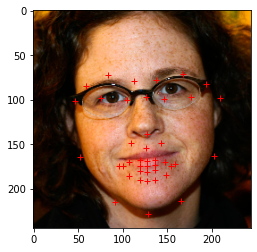

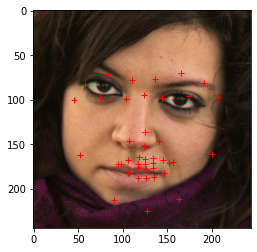

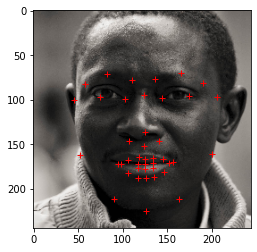

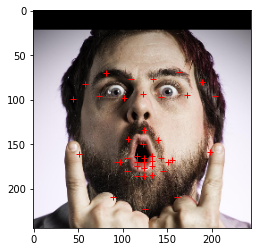

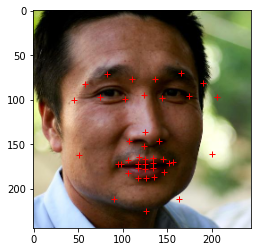

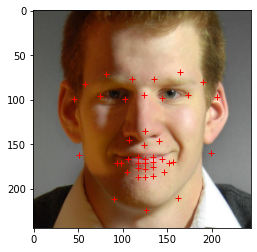

In [17]:
# Visualise example images with face landmarks

for i in range(6):
  visualise_pts(example_images[i], ex_pred[i])

In [ ]:
train_pred= model.predict(X_train)
train_pred= train_pred.reshape(-1, 42, 2)

In [ ]:
scores= model.evaluate(X_train, y_train)

22/22 [==============================] - 14s 635ms/step - loss: 114.4986 - accuracy: 0.7843


In [ ]:
print("Loss: " + str(scores[0]))

print("Accuracy: " + str(scores[1]))

Loss: 116.56063842773438
Accuracy: 0.7956249713897705


In [ ]:
# Get predictions for test images
predictions= model.predict(X_test)
predictions= predictions.reshape(-1, 42, 2)

In [ ]:
print(train_pred.shape)

(700, 42, 2)


# Calculating Prediction Error and exporting results

In [ ]:
def euclid_dist(pred_pts, gt_pts):
  """
  Calculate the euclidean distance between pairs of points
  :param pred_pts: The predicted points
  :param gt_pts: The ground truth points
  :return: An array of shape (no_points,) containing the distance of each predicted point from the ground truth
  """
  import numpy as np
  from scipy.spatial import distance
  pred_pts = np.reshape(pred_pts, (-1, 2))
  gt_pts = np.reshape(gt_pts, (-1, 2))
  print(pred_pts.shape)
  print(gt_pts.shape)
  return np.sqrt(np.sum(np.square(pred_pts - gt_pts), axis=-1))
  #return np.linalg.norm(pred_pts - pred_pts)
eu_dist= euclid_dist(train_pred, pts[:700])


(29400, 2)
(29400, 2)


In [ ]:
eu_dist = np.sort(eu_dist)

In [ ]:
print(pts.shape)

(2811, 42, 2)


In [ ]:
newarr = eu_dist[:2811]

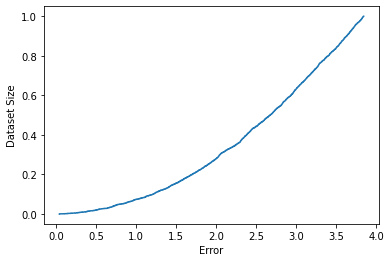

In [ ]:
#Graph to visualise the cumulative error distribution
import matplotlib.pyplot as plt
plt.step(newarr, np.linspace(0, 1,len(pts)))
plt.ylabel('Dataset Size')
plt.xlabel('Error')
plt.show()

Eye Change Color 
points [18,19,20,21]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


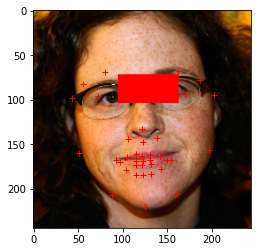

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


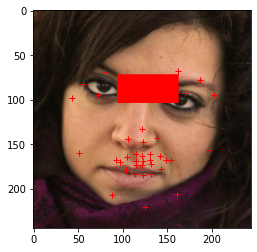

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


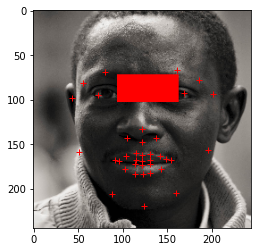

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


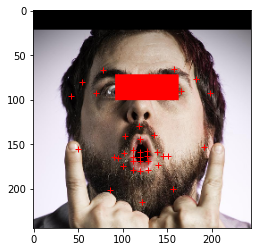

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


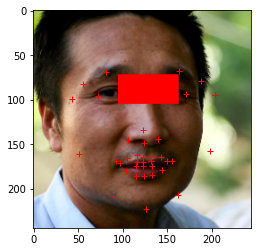

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


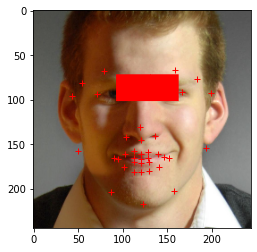

In [ ]:

for i in range(6):
  example_images[i,ex_pred[0,18,0].astype('int64'):ex_pred[i,23,0].astype('int64'),ex_pred[i,18,1].astype('int64'):ex_pred[0,23,1].astype('int64')] = (255,0,0)

for i in range(6):
  plt.imshow(example_images[i])
  plt.plot(ex_pred[i,:, 0], ex_pred[i,:, 1], '+r')
  plt.show()


In [ ]:
def save_as_csv(points, location = '.'):
    """
    Save the points out as a .csv file
    :param points: numpy array of shape (no_test_images, no_points, 2) to be saved
    :param location: Directory to save results.csv in. Default to current working directory
    """
    assert points.shape[0]==554, 'wrong number of image points, should be 554 test images'
    assert np.prod(points.shape[1:])==2*42, 'wrong number of points provided. There should be 42 points with 2 values (x,y) per point'
    np.savetxt(location + '/results.csv', np.reshape(points, (points.shape[0], -1)), delimiter=',')


In [ ]:
save_as_csv(predictions)